In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import tilemapbase as tmb

from EmotionalCities.Streams.dataset import Dataset

%matplotlib inline
plt.style.use('ggplot')


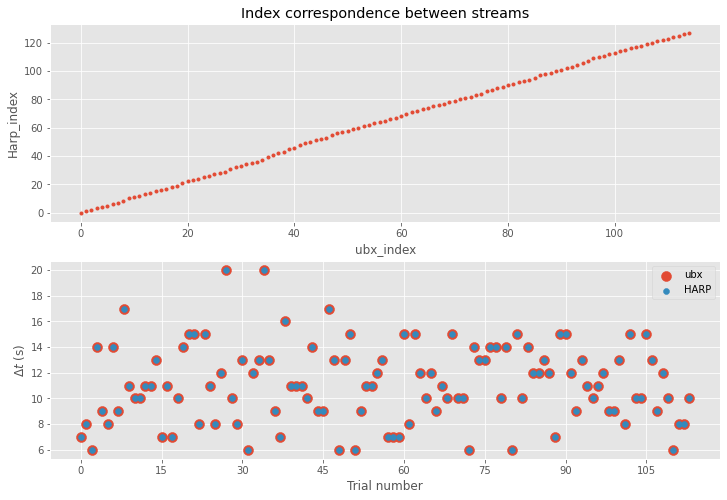

In [2]:
stream_root_folder = r"C:\Users\neurogears\Desktop\EC_datasets\FMUL2022_10_21_11_20_53"
dataset = Dataset(stream_root_folder, datasetlabel='FMUL2022_10_21_11_20_53')

#dataset.populate_streams(autoload = True)
#dataset.export_streams()
dataset.import_streams()


drift_correction_model = dataset.calibrate_ubx_to_harp(plot_diagnosis=True)
dataset.add_ubx_georeference(event = "NAV-HPPOSLLH", calibrate_clock = True)


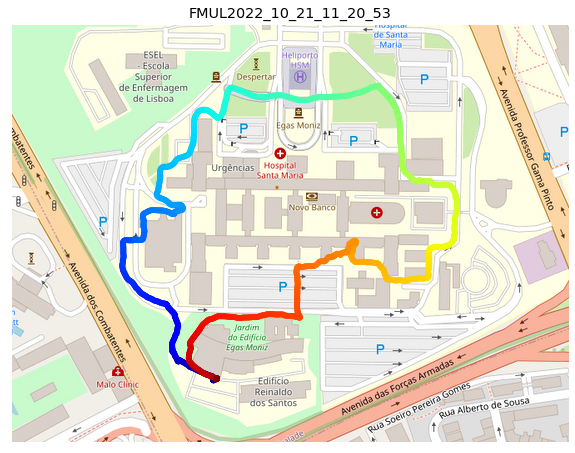

In [3]:
tiles = tmb.tiles.Stamen_Watercolour
fig = dataset.showmap(colorscale_override=dataset.georeference.index,
                      cmap = "jet",
                      markersize= 30, figsize = (10,10)
                      )
plt.title(dataset.datasetlabel)
plt.show()

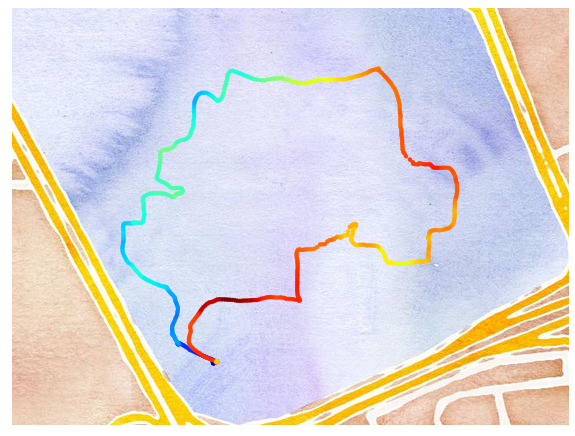

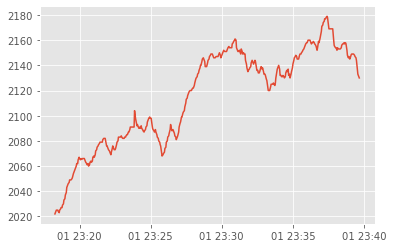

In [4]:
from EmotionalCities.Processing.resampling import resample_temporospatial
from EmotionalCities.Visualization.maps import showmap

resampled = resample_temporospatial(dataset.streams.TK.AirQuality.Temperature.data,
                                    dataset.georeference)

fig = showmap(resampled, figsize=(10,10), tiles=tiles)
plt.show()
plt.figure
plt.plot(resampled.Data)
plt.show()


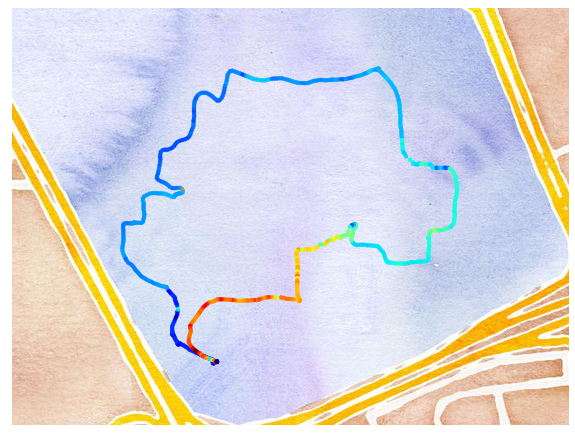

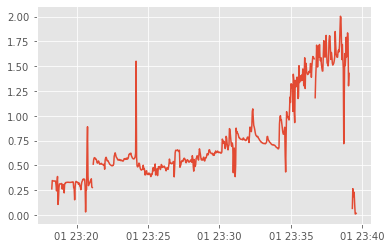

In [5]:
resampled = resample_temporospatial(dataset.streams.Empatica.data.E4_Gsr["Value"], dataset.georeference)

fig = showmap(resampled, figsize=(10,10), tiles= tiles)
plt.show()
plt.figure
plt.plot(resampled.Data)
plt.show()


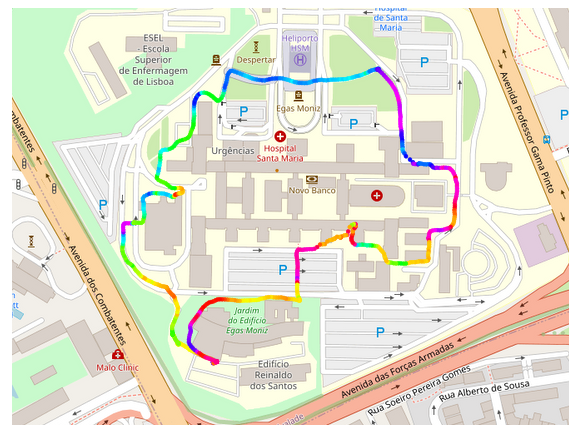

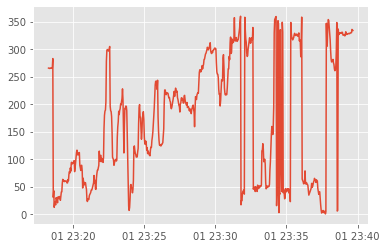

In [6]:
from EmotionalCities.Processing.resampling import resample_temporospatial_circ
resampled = resample_temporospatial_circ(dataset.streams.Accelerometer.data['Orientation.X'],
                                         dataset.georeference)

fig = showmap(resampled, figsize=(10,10), cmap = 'hsv')
plt.show()
plt.figure
plt.plot(resampled.Data)
plt.show()


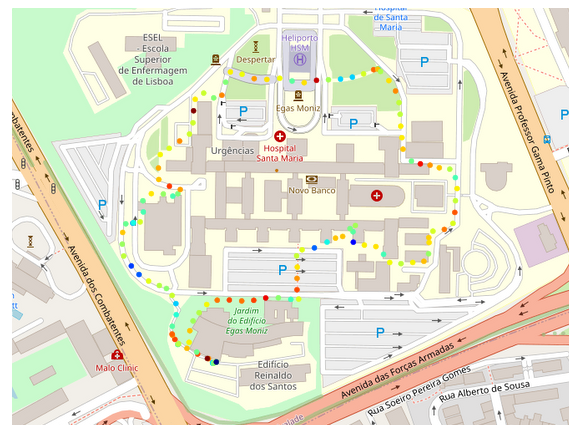

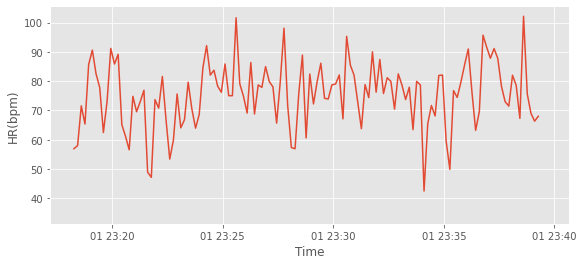

In [10]:
from EmotionalCities.Processing.ecg import heartrate_from_ecg

hr,_ = heartrate_from_ecg(dataset.streams.BioData.ECG,
                                         fs = 250, max_heartrate_bpm = 250.0,
                                        peak_height = 800, smooth_win = 10)

resampled = resample_temporospatial(hr, dataset.georeference,
                                           sampling_dt = datetime.timedelta(seconds = 10))
fig = showmap(resampled, figsize=(10,10), cmap = 'jet', markersize = 25 )
plt.show()
plt.figure(figsize= (9.3,4))
plt.plot(resampled.Data)
plt.xlabel('Time')
plt.ylabel('HR(bpm)')
plt.show()

In [11]:
#dataset.streams.TK.AmbientLight.AmbientLight.load()
dataset.streams.TK.AmbientLight.AmbientLight.plot(color = "cyan")
plt.legend()

ValueError: Input dataframe is empty.

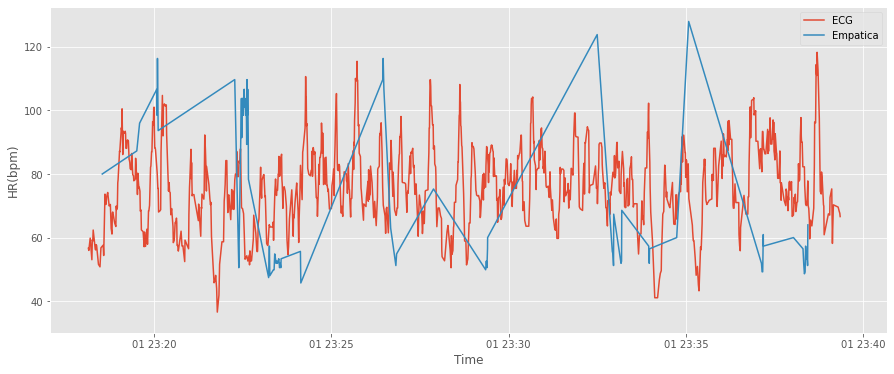

In [16]:
plt.figure(figsize=(15,6))
plt.plot(hr, label = 'ECG')
plt.plot(dataset.streams.Empatica.data.E4_Hr['Value'], label = 'Empatica')
plt.xlabel("Time")
plt.ylabel("HR(bpm)")
plt.legend()
plt.show()